# 1. 강의영상 

# 2. Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import sklearn.linear_model

# 3. Data

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/MP2023/main/posts/employment_multicollinearity.csv")
np.random.seed(43052)
df['employment_score'] = df.gpa * 1.0 + df.toeic* 1/100 + np.random.randn(500)

In [3]:
df

,employment_score,gpa,toeic,toeic0,toeic1,toeic2,toeic3,toeic4,toeic5,toeic6,...,toeic490,toeic491,toeic492,toeic493,toeic494,toeic495,toeic496,toeic497,toeic498,toeic499
0,1.784955,0.051535,135,129.566309,133.078481,121.678398,113.457366,133.564200,136.026566,141.793547,...,132.014696,140.013265,135.575816,143.863346,152.162740,132.850033,115.956496,131.842126,125.090801,143.568527
1,10.789671,0.355496,935,940.563187,935.723570,939.190519,938.995672,945.376482,927.469901,952.424087,...,942.251184,923.241548,939.924802,921.912261,953.250300,931.743615,940.205853,930.575825,941.530348,934.221055
2,8.221213,2.228435,485,493.671390,493.909118,475.500970,480.363752,478.868942,493.321602,490.059102,...,484.438233,488.101275,485.626742,475.330715,485.147363,468.553780,486.870976,481.640957,499.340808,488.197332
3,2.137594,1.179701,65,62.272565,55.957257,68.521468,76.866765,51.436321,57.166824,67.834920,...,67.653225,65.710588,64.146780,76.662194,66.837839,82.379018,69.174745,64.475993,52.647087,59.493275
4,8.650144,3.962356,445,449.280637,438.895582,433.598274,444.081141,437.005100,434.761142,443.135269,...,455.940348,435.952854,441.521145,443.038886,433.118847,466.103355,430.056944,423.632873,446.973484,442.793633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,9.057243,4.288465,280,276.680902,274.502675,277.868536,292.283300,277.476630,281.671647,296.307373,...,269.541846,278.220546,278.484758,284.901284,272.451612,265.784490,275.795948,280.465992,268.528889,283.638470
496,4.108020,2.601212,310,296.940263,301.545000,306.725610,314.811407,311.935810,309.695838,301.979914,...,304.680578,295.476836,316.582100,319.412132,312.984039,312.372112,312.106944,314.101927,309.409533,297.429968
497,2.430590,0.042323,225,206.793217,228.335345,222.115146,216.479498,227.469560,238.710310,233.797065,...,233.469238,235.160919,228.517306,228.349646,224.153606,230.860484,218.683195,232.949484,236.951938,227.997629
498,5.343171,1.041416,320,327.461442,323.019899,329.589337,313.312233,315.645050,324.448247,314.271045,...,326.297700,309.893822,312.873223,322.356584,319.332809,319.405283,324.021917,312.363694,318.493866,310.973930


# 4. True

`-` 신이라면 (=데이터가 만들어진 비밀을 알고 있다면) 아래와 같이 했을 것 

In [12]:
## step1 
df_train, df_test = sklearn.model_selection.train_test_split(df,test_size=0.3,random_state=42)
X = df_train.loc[:,'gpa':'toeic']
y = df_train[['employment_score']]
XX = df_test.loc[:,'gpa':'toeic']
yy = df_test[['employment_score']]
## step2 
predictr = sklearn.linear_model.LinearRegression()
## step3
predictr.fit(X,y)
## step4 : pass 


LinearRegression()

`-` 평가

In [23]:
print(f'train_score:\t {predictr.score(X,y):.4f}')
print(f'test_score:\t {predictr.score(XX,yy):.4f}')

train_score:	 0.9133
test_score:	 0.9127


# 5. Baseline

`-` 모든 변수를 활용하여 회귀모형으로 적합 $\to$ 최악의 결과 

In [24]:
## step1 
df_train, df_test = sklearn.model_selection.train_test_split(df,test_size=0.3,random_state=42)
X = df_train.loc[:,'gpa':'toeic499']
y = df_train[['employment_score']]
XX = df_test.loc[:,'gpa':'toeic499']
yy = df_test[['employment_score']]
## step2 
predictr = sklearn.linear_model.LinearRegression()
## step3
predictr.fit(X,y)
## step4 : pass 


LinearRegression()

`-` 평가

In [25]:
print(f'train_score:\t {predictr.score(X,y):.4f}')
print(f'test_score:\t {predictr.score(XX,yy):.4f}')

train_score:	 1.0000
test_score:	 0.1171


# 6. Ridge

`-` 통계학자에게 자문: 이럴 경우 Ridge를 사용하면 됩니다..

In [30]:
## step1 
df_train, df_test = sklearn.model_selection.train_test_split(df,test_size=0.3,random_state=42)
X = df_train.loc[:,'gpa':'toeic499']
y = df_train[['employment_score']]
XX = df_test.loc[:,'gpa':'toeic499']
yy = df_test[['employment_score']]
## step2 
predictr = sklearn.linear_model.Ridge(alpha=1) # predictr = sklearn.linear_model.Ridge() 와 결과가 같다. 
## step3
predictr.fit(X,y)
## step4 : pass 


Ridge(alpha=1)

`-` 평가: Ridge 안 되는데요, 교수님.. 

In [31]:
print(f'train_score:\t {predictr.score(X,y):.4f}')
print(f'test_score:\t {predictr.score(XX,yy):.4f}')

train_score:	 1.0000
test_score:	 0.1173


`-` 하이퍼 파라메터 튜닝 $\alpha=1.5$ 

In [36]:
## step1 
df_train, df_test = sklearn.model_selection.train_test_split(df,test_size=0.3,random_state=42)
X = df_train.loc[:,'gpa':'toeic499']
y = df_train[['employment_score']]
XX = df_test.loc[:,'gpa':'toeic499']
yy = df_test[['employment_score']]
## step2 
predictr = sklearn.linear_model.Ridge(alpha=1.5) 
## step3
predictr.fit(X,y)
## step4 : pass 

#---#

print(f'train_score:\t {predictr.score(X,y):.4f}')
print(f'test_score:\t {predictr.score(XX,yy):.4f}')

train_score:	 1.0000
test_score:	 0.1174


- 좋아졌다?

`-` 하이퍼 파라메터 튜닝 $\alpha=5e8$ 

In [49]:
## step1 
df_train, df_test = sklearn.model_selection.train_test_split(df,test_size=0.3,random_state=42)
X = df_train.loc[:,'gpa':'toeic499']
y = df_train[['employment_score']]
XX = df_test.loc[:,'gpa':'toeic499']
yy = df_test[['employment_score']]
## step2 
predictr = sklearn.linear_model.Ridge(alpha=5e8) 
## step3
predictr.fit(X,y)
## step4 : pass 

#---#

print(f'train_score:\t {predictr.score(X,y):.4f}')
print(f'test_score:\t {predictr.score(XX,yy):.4f}')

train_score:	 0.7507
test_score:	 0.7438


`-` 오라클에 비할바는 아니긴한데 공선성이 있는 경우라도 Ridge에서 적절한 alpha를 고른다면 망하는 모형을 만들진 않음 

# 7. Ridge는 왜 결과를 좋게 만들까? 

## A. 정확한 설명 

`-` SVD를 이용하여 이론적인 계산하면 `sklearn.linear_model.LinearRegression()`로 적합한 결과보다 `sklearn.linear_model.Ridge()`로 적합한 결과를 더 좋게 만드는 $\alpha$가 항상 존재함을 증명할 수 있음. 


## B.  직관적 설명 (엄밀하지 않은 설명)

### `Step1:` LinearRegression은 왜 망했는가?

`-` 토익의 계수는 실제로 $\frac{1}{100}$이다. 적딩히 

- `toeic` + ... + `toeic499` $\approx$ 0.01 이라면 

대충 맞는 답이다. 


In [101]:
## step1 
df_train, df_test = sklearn.model_selection.train_test_split(df,test_size=0.3,random_state=42)
X = df_train.loc[:,'gpa':'toeic499']
y = df_train[['employment_score']]
XX = df_test.loc[:,'gpa':'toeic499']
yy = df_test[['employment_score']]
## step2 
predictr = sklearn.linear_model.LinearRegression() 
## step3
predictr.fit(X,y)
## step4 : pass 

#---#

print(f'train_score:\t {predictr.score(X,y):.4f}')
print(f'test_score:\t {predictr.score(XX,yy):.4f}')

train_score:	 1.0000
test_score:	 0.1171


In [102]:
predictr.coef_.reshape(-1)[1:].sum()

0.010302732920632579

`-` 그런데 사실 저 `0.01`이라는 값은 몇개의 계수만 있어도 만들 수 있다. 

In [104]:
predictr.coef_.reshape(-1)[[4,5]].sum()

0.010142832986793252

`-` 이런논리로 치면 4,5에 해당하는 계수 (즉 `toeic2`, `toeic3`에 해당하는 계수) 만 있다면 사실 $y$를 설명하는데 충분했고, 나머지는 불필요한 특징이 된다. (그리고 불필요한 특징은 오버피팅을 유발한다)

### `Step2:` Ridge의 아이디어

`-` Ridge의 아이디어: `toeic2`, `toeic3` 와 같이 몇개의 변수로만 `0.01`이라는 수를 설명할 수 없도록 "강제"하자. 즉 몇개의 변수로만 `0.01`이라는 수를 설명할 수 없도록 "패널티"를 주자. 

`-` 패널티: 유사토익들의 계수값을 제곱한뒤 합치고(=$l_2$-norm을 구하고), 그 값이 0에서 떨어져 있을 수록 패널티를 줄꺼야!

- 그렇다면..? 0.01을 그냥 엔빵^[용어 죄송합니다.. $\frac{1}{n}$이라고하기 좀 그래서요, 정확하게는 $\frac{1}{p}$ 아닐까 해서요]해서 설명하면 되지않나? 

`-` 패널티를 주는 정도? $\alpha$로 조절함.. $\alpha$를 크게 할수록 패널티를 많이줌

## C. $\alpha$에 따른 계수값 변화 

`-` 여러개의 predictor 학습 

In [123]:
## step1 
df_train, df_test = sklearn.model_selection.train_test_split(df,test_size=0.3,random_state=42)
X = df_train.loc[:,'gpa':'toeic499']
y = df_train[['employment_score']]
XX = df_test.loc[:,'gpa':'toeic499']
yy = df_test[['employment_score']]
# step2: 여러개의 predictor 생성 
alphas = [5e2, 5e3, 5e4, 5e5, 5e6, 5e7, 5e8]
predictrs = [sklearn.linear_model.Ridge(alpha=alpha) for alpha in alphas]
# step3: fit 
for predictr in predictrs:
    predictr.fit(X,y)

`-` 계수값 시각화 

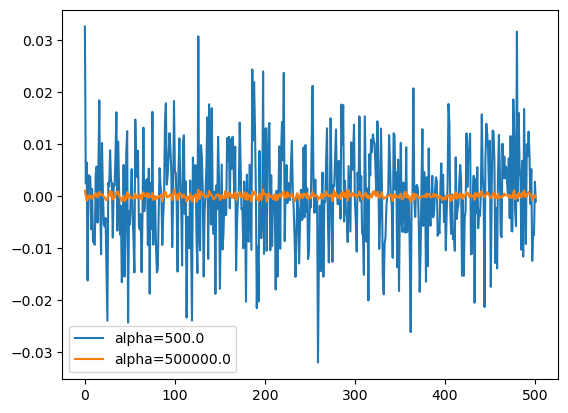

In [146]:
plt.plot(predictrs[0].coef_.reshape(-1),label=f'alpha={predictrs[0].alpha}')
plt.plot(predictrs[3].coef_.reshape(-1),label=f'alpha={predictrs[3].alpha}')
plt.legend()

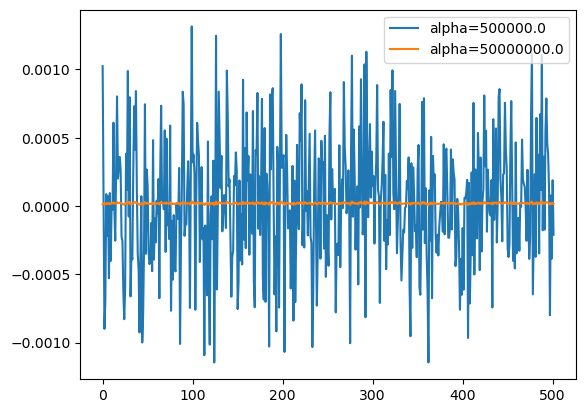

In [148]:
plt.plot(predictrs[3].coef_.reshape(-1),label=f'alpha={predictrs[3].alpha}')
plt.plot(predictrs[5].coef_.reshape(-1),label=f'alpha={predictrs[5].alpha}')
plt.legend()

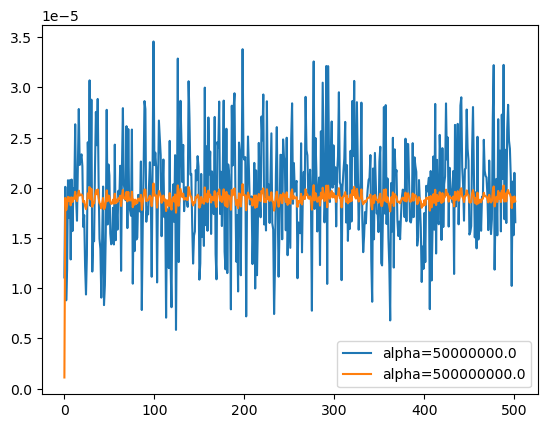

In [149]:
plt.plot(predictrs[5].coef_.reshape(-1),label=f'alpha={predictrs[5].alpha}')
plt.plot(predictrs[-1].coef_.reshape(-1),label=f'alpha={predictrs[-1].alpha}')
plt.legend()

`-` 직관: 마지막 predictor의 계수값을 살펴보자. 

In [159]:
predictrs[-1].coef_.reshape(-1)

array([1.10421248e-06, 1.89938091e-05, 1.77768343e-05, 1.82118332e-05,
       1.90895673e-05, 1.87128138e-05, 1.90343037e-05, 1.82483251e-05,
       1.90405022e-05, 1.85802628e-05, 1.90021086e-05, 1.88952130e-05,
       1.96003229e-05, 1.89154663e-05, 1.86638217e-05, 1.92666606e-05,
       1.97107043e-05, 1.92214868e-05, 1.92961317e-05, 1.93321368e-05,
       1.92194541e-05, 1.85663279e-05, 1.86805137e-05, 1.81649873e-05,
       1.78656367e-05, 1.83171419e-05, 1.94428947e-05, 1.89710925e-05,
       2.00598946e-05, 1.88384883e-05, 1.98903125e-05, 1.81113551e-05,
       1.85043847e-05, 1.84424971e-05, 1.91508275e-05, 1.97427867e-05,
       1.93598061e-05, 1.98264264e-05, 1.89934042e-05, 1.84770850e-05,
       1.83617634e-05, 1.79346774e-05, 1.84943159e-05, 1.89803006e-05,
       1.78633749e-05, 1.80073666e-05, 1.85664525e-05, 1.97390143e-05,
       1.86574281e-05, 1.92233226e-05, 1.91281904e-05, 1.85617627e-05,
       1.83939489e-05, 1.84309427e-05, 1.88142167e-05, 1.84159665e-05,
      

- 불필요한 변수가 나올수 없는 구조임. (한 두개로 전체를 설명할 수 없음)
- 모든 변수는 대략 2e-5($\approx \frac{1}{100}\frac{1}{501}$) 만큼의 가치가 있음. 여기에서 1/100은 원래 토익의 계수, 501이라는 숫자는 (토익+유사토익)점수를 의미하는 변수의 숫자
- 고급: 살짝 1/(100*501)보다 전체적으로 값이 작아보이는건 기분탓은 아님 (Ridge의 특징)

In [161]:
1/(100*501)

1.9960079840319362e-05

## D. $\alpha$에 따른 실험내용 정리 

In [162]:
sum(predictrs[0].coef_.reshape(-1)**2)

0.04671489217911739

In [163]:
predictrs[0].score(XX,yy)

0.20264452460057358

In [193]:
for predictr in predictrs:
    print(f'alpha={predictr.alpha:.1e}\t'
          f'panalty={sum(predictr.coef_.reshape(-1)**2):.3f}\t'
          f'toeic_coefs.sum()={sum(predictr.coef_.reshape(-1)[1:]):.4f} \t'
          f'test_score={predictr.score(XX,yy):.2f}')

alpha=5.0e+02	panalty=0.047	toeic_coefs.sum()=0.0103 	test_score=0.20
alpha=5.0e+03	panalty=0.022	toeic_coefs.sum()=0.0102 	test_score=0.46
alpha=5.0e+04	panalty=0.003	toeic_coefs.sum()=0.0099 	test_score=0.69
alpha=5.0e+05	panalty=0.000	toeic_coefs.sum()=0.0099 	test_score=0.74
alpha=5.0e+06	panalty=0.000	toeic_coefs.sum()=0.0099 	test_score=0.74
alpha=5.0e+07	panalty=0.000	toeic_coefs.sum()=0.0098 	test_score=0.75
alpha=5.0e+08	panalty=0.000	toeic_coefs.sum()=0.0095 	test_score=0.74


## E. $\alpha$가 크다고 무조건 좋은건 아니다. 

In [10]:
## step1 
df_train, df_test = sklearn.model_selection.train_test_split(df,test_size=0.3,random_state=42)
X = df_train.loc[:,'gpa':'toeic499']
y = df_train[['employment_score']]
XX = df_test.loc[:,'gpa':'toeic499']
yy = df_test[['employment_score']]
## step2 
predictr = sklearn.linear_model.Ridge(alpha=1e12) 
## step3
predictr.fit(X,y)
## step4 : pass 

#---#

print(f'train_score:\t {predictr.score(X,y):.4f}')
print(f'test_score:\t {predictr.score(XX,yy):.4f}')

train_score:	 0.0191
test_score:	 0.0140


In [17]:
predictr.coef_[0][1:].sum() # 걍 사이좋게 0.. alpha가 커질수록 0.01에서 점점 줄어드는건 기분탓이 아니었어..

0.00012585319204891574